In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer        
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The available dataset describes 48895 specific AirBnb listings specific to 2019, originally sourced from the Inside AirBnb project. The project has an aim to demonstrate the impact of short-term rentals on housing availability and affordability in the area. There are 16 (column) features in total in the original dataset that detail geographic information, hosting details, the reviews of the listings and availabilities. In the problem described, prediction of reviews_per_month as the target variable is used to represent the popularity of the listings via the attention and frequency of the booking, thus informing hosts on the features that increase appeal. The reviews per month are calculated over the lifetime of the listings as "IF scrape_date - first_review <= 30 THEN number_of_reviews
ELSE number_of_reviews / ((scrape_date - first_review + 1) / (365/12))" (InsideAirBnb)

In [3]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')
print(airbnb_df.info())
airbnb_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# GLOBAL VARIABLES

In [5]:
# taken from lecture 10
from sklearn.metrics import make_scorer


def my_mape(true, pred):
    return np.mean(np.abs((pred - true) / true))

mape_scorer = make_scorer(my_mape, greater_is_better=False)

scoring = {
    "r2": "r2",
    "mape_scorer": mape_scorer, # custom scorer from lecture 
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "RMSE": "neg_root_mean_squared_error",
    "MSE": "neg_mean_squared_error",
}


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [6]:
train_df, test_df = train_test_split(airbnb_df, test_size=0.6, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

1. EDA Conducted below: characterization of columns of train_df via calculation of non-null values, min max mean of numerical columns.


2. - a) The mean number of reviews per month is 1.36 and the median is 0.70, indicating that while a small number of listings receive frequent reviews, most listings experience very low monthly review activity.

    - b) The standard deviation of reviews per month is significant in magnitude, especially when compared to the mean (std ≈ 1.64 vs. mean ≈ 1.36), indicating that review activity varies significantly among listings and suggesting that while most listings receive minimal engagement, a smaller subset experiences significantly higher demand and accumulates reviews faster.

    - c) The histogram exhibits how the disparity between mean and median reflects right-skew; most listings receive 0–1 reviews per month, however a small number receive many (above 7-10)

    - d) According to the location scatter plot, the spatial distribution highlights that demand and guest engagement vary significantly depending on the latitude and longitude of the neighborhood; this reinforces that location may be a significant feature in listing activity and popularity, as there are clusters of lighter colored (more populous) data points.

3. From an initial exploration of the training set, there are a total of 19558 entries and 16 features (6 categorized variables as objects, 10 as numerical). The last_review and reviews_per_month have the equivalent missing value count of 20.7% (and non-null count of 15614), which is logical considering the reviews_per_month would be unavailable in the case where the listing has never been reviewed, and hence the last_review would also be missing. This missingness is informative about listing performance, as it indicates a lack of documented activity or opinion on the listing. Although there is no clear documentation indicating whether the values were unable to be sourced, or equivalent to zero, this project will assume that each instance of  are imputed with the value of 0. This avoids distortion during modeling, as using the mean or median imputation would inflate review counts for listings. Additionally, because no listings in the dataset naturally have a recorded 0 reviews per month, imputing zero does not overwrite or obscure true existing values, which maintains data integrity. If we instead dropped listings with missing review data, over one-fifth of the dataset would be eliminated, potentially biasing the training data toward only well-reviewed, higher-activity listings, which would significantly skew the model’s real-world applicability. The correlation between price and reviews per month is negative but small in magnitude, indicating that listings with higher prices tend to receive fewer monthly reviews, while more frequently reviewed listings are lower priced. 

4. Evaluation Metrics: Considering that the prediction of the number of reviews per month is a regression problem, and the distribution is heavily skewed by the number of close-to-zero values, an appropriate metric would be the root mean squared error (RMSE) as it presents the prediction in the same units of the target variable, which is averaged as the number of reviews over the lifetime of the listing. RMSE also penalizes substantial errors when the model predicts them, which matters as some listings have very high review activity but the majority do not, and these outliers could significantly impact the accuracy of the prediction. Along with RMSE, R^2 could be used to measure the variation in reviews_per_month and comparing the prediction model to the naive baseline to judge performance. 

In [7]:
print(train_df.info())
print(train_df.shape)   


print(train_df['host_id'].nunique())
print(train_df['host_id'].value_counts())

print(train_df['neighbourhood'].nunique())
print(train_df['neighbourhood'].value_counts())
print(train_df.describe(include='object'))  # summary stats for categorical columns


<class 'pandas.core.frame.DataFrame'>
Index: 19558 entries, 13505 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19558 non-null  int64  
 1   name                            19550 non-null  object 
 2   host_id                         19558 non-null  int64  
 3   host_name                       19551 non-null  object 
 4   neighbourhood_group             19558 non-null  object 
 5   neighbourhood                   19558 non-null  object 
 6   latitude                        19558 non-null  float64
 7   longitude                       19558 non-null  float64
 8   room_type                       19558 non-null  object 
 9   price                           19558 non-null  int64  
 10  minimum_nights                  19558 non-null  int64  
 11  number_of_reviews               19558 non-null  int64  
 12  last_review                     1

In [47]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,local_density,days_since_last_review,number_of_reviews_log
13505,10104806,Spacious and cozy room!,11095923,Tobias,Brooklyn,Bushwick,40.69802,-73.91472,Private room,40,1,0,NaT,NaN,3,0,114,NaN,0.000000
8615,6627553,MODERN LOFT 3 STOPS TO MANHATTAN!!,16941743,Ernesto,Queens,Astoria,40.76482,-73.92514,Private room,40,2,36,2017-09-16,0.73,1,0,100,2963.0,3.610918
37060,29460203,Charming Room with 2 Beds Near Metro,105386434,Felix Lion,Brooklyn,Bedford-Stuyvesant,40.69304,-73.94349,Private room,72,2,15,2019-06-23,1.77,3,365,170,2318.0,2.772589
30742,23789466,Cozy Mid Century Modern Studio 15 min to Manha...,178507107,Alyssa,Brooklyn,Bushwick,40.70484,-73.92117,Entire home/apt,100,2,7,2018-04-29,0.45,1,0,176,2738.0,2.079442
20356,16258754,Cozy Modern Bedroom In A Newly Updated Apt,8091133,Daniel,Brooklyn,Bushwick,40.70040,-73.91934,Private room,40,2,0,NaT,NaN,1,0,181,NaN,0.000000


In [48]:
print(train_df.describe())

                 id       host_id      latitude     longitude         price  \
count  1.955800e+04  1.955800e+04  19558.000000  19558.000000  19558.000000   
mean   1.883431e+07  6.652727e+07     40.729137    -73.951938    150.967942   
min    2.539000e+03  2.438000e+03     40.507080    -74.242850      0.000000   
25%    9.303320e+06  7.656499e+06     40.690080    -73.982750     69.000000   
50%    1.936397e+07  3.028359e+07     40.722985    -73.955405    105.000000   
75%    2.901352e+07  1.053641e+08     40.763388    -73.936120    175.000000   
max    3.648543e+07  2.743115e+08     40.912340    -73.712990  10000.000000   
std    1.100645e+07  7.806691e+07      0.054629      0.046189    241.965858   

       minimum_nights  number_of_reviews                    last_review  \
count    19558.000000       19558.000000                          15614   
mean         7.190050          23.214183  2018-10-01 15:57:12.150634240   
min          1.000000           0.000000            2011-03-28 

In [49]:
missing_percent = (train_df.isna().sum() / train_df.shape[0]) * 100
missing_percent = missing_percent.round(2)
missing_percent

id                                 0.00
name                               0.04
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.17
reviews_per_month                 20.17
calculated_host_listings_count     0.00
availability_365                   0.00
local_density                      0.00
days_since_last_review            20.17
number_of_reviews_log              0.00
dtype: float64

In [50]:
print((airbnb_df['reviews_per_month'] == 0).sum())
print((train_df['reviews_per_month'] == 0).sum())

0
0


In [51]:
number_missing = (train_df.isna().sum())
number_missing

id                                   0
name                                 8
host_id                              0
host_name                            7
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3944
reviews_per_month                 3944
calculated_host_listings_count       0
availability_365                     0
local_density                        0
days_since_last_review            3944
number_of_reviews_log                0
dtype: int64

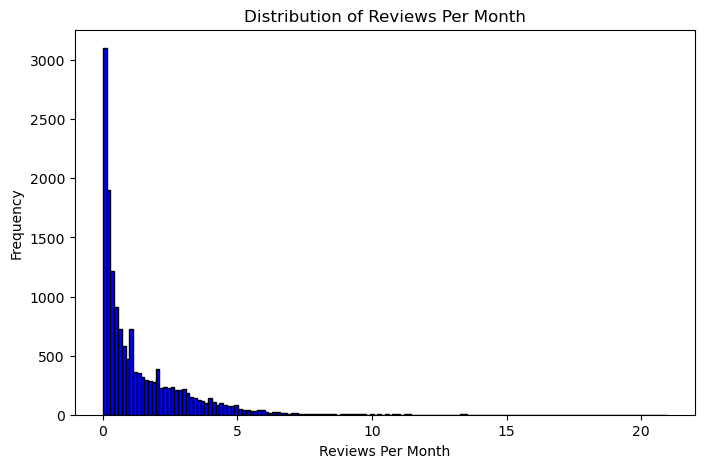

(np.float64(1.3558806199564495), np.float64(0.7))


In [52]:
plt.figure(figsize=(8,5))
plt.hist(train_df['reviews_per_month'].dropna(), bins=150, color='blue', edgecolor='black')
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")
plt.show()

print(((train_df['reviews_per_month'].mean()), (train_df['reviews_per_month'].median())))

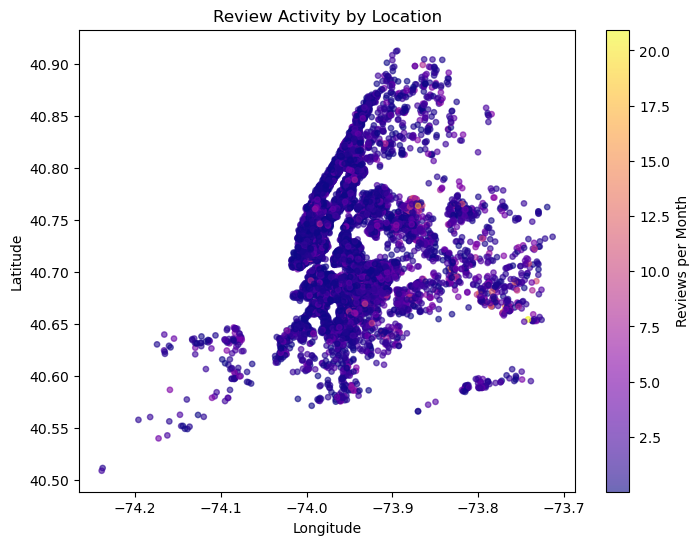

In [53]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    train_df['longitude'], 
    train_df['latitude'], 
    c=train_df['reviews_per_month'],   # color based on review activity
    cmap='plasma', 
    alpha=0.6, 
    s=15
)

plt.colorbar(scatter, label='Reviews per Month')
plt.title("Review Activity by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [54]:
train_df['last_review'] = pd.to_datetime(train_df['last_review'])


print(train_df['last_review'].describe())
no_review_pct = train_df['last_review'].isna().mean() * 100
print(f"\nPercentage of listings with no reviews recorded: {no_review_pct:.2f}%")

count                            15614
mean     2018-10-01 15:57:12.150634240
min                2011-03-28 00:00:00
25%                2018-07-05 00:00:00
50%                2019-05-19 00:00:00
75%                2019-06-23 00:00:00
max                2019-07-08 00:00:00
Name: last_review, dtype: object

Percentage of listings with no reviews recorded: 20.17%


In [55]:
correlation = train_df['price'].corr(train_df['reviews_per_month'])
print(f"Correlation between price and reviews_per_month: {correlation:.3f}")

Correlation between price and reviews_per_month: -0.031


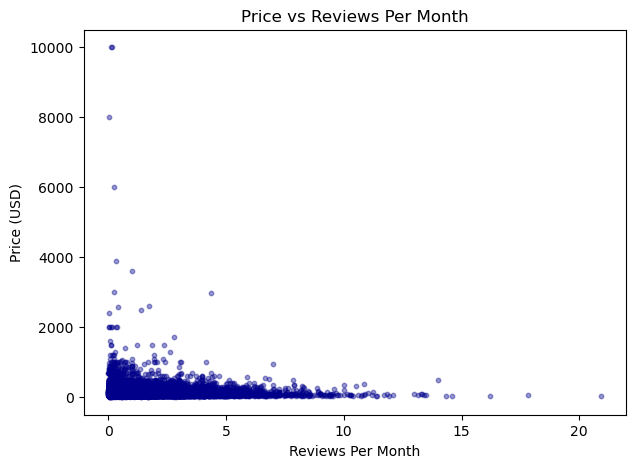

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(train_df['reviews_per_month'], train_df['price'], alpha=0.4, s=10, color='darkblue')
plt.title("Price vs Reviews Per Month")
plt.xlabel("Reviews Per Month")
plt.ylabel("Price (USD)")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [57]:
for col in train_df.columns:
    print(f"Column: {col}")
    print(train_df[col].unique())

Column: id
[10104806  6627553 29460203 ... 13915004 21897845 12711351]
Column: name
['Spacious and cozy room!' 'MODERN LOFT  3 STOPS TO MANHATTAN!!'
 'Charming Room with 2 Beds Near Metro' ...
 'Sunlit, spacious NY apartment' 'One room.'
 'Cozy Private Room w/ 1 Queen Bed']
Column: host_id
[ 11095923  16941743 105386434 ...  66501870   7177483 159769278]
Column: host_name
['Tobias' 'Ernesto' 'Felix Lion' ... 'Rossana' 'K Alexandra' 'Musieka']
Column: neighbourhood_group
['Brooklyn' 'Queens' 'Manhattan' 'Bronx' 'Staten Island']
Column: neighbourhood
['Bushwick' 'Astoria' 'Bedford-Stuyvesant' 'Williamsburg'
 'Lower East Side' "Hell's Kitchen" 'Midtown' 'Harlem' 'Greenpoint'
 'East Harlem' 'Long Island City' 'NoHo' 'South Slope' 'Chelsea' 'Belmont'
 'Upper West Side' 'West Village' 'Murray Hill' 'Greenwich Village'
 'Financial District' 'Brownsville' 'Rosedale' 'Woodside' 'East Village'
 'Morningside Heights' 'Upper East Side' 'Carroll Gardens' 'Sunset Park'
 'Ridgewood' 'Kew Gardens' 'Ki

Logic for feature engineering: 

Text (name) of the listing could provide useful information on the how descriptions / names impact the engagement via marketing phrases; for example the popularity of attracting customers for listing (thus inspiring reviews). Use Count Vectorizerto convert into vectors.

As neighborhood group only includes 5 distinct groups, one-hot encode. 
As room_type only includes 3 distinct groups, one-hot encode. 
Neighborhood should also be one-hot encoded.

As geographic information has a correlation with the number of reviews per month, it would be helpful to use a distance-based metric to allow greater contextualization. By themselves, raw latitude and longitude values encode precise location but do not express regional similarity or local density. By applying nearest neighbors on the latitude and longitude, we can determine the local density of neighbors surrounding a listing that could indicate denser traffic and high-demand, thus leading to a larger number of reviews.
new feature = ['local_density'] = densities 

Due to the heavy skew of values toward the right, and the number of 0 listing data points, it would be helpful to apply a log transformation on the number_of_reviews using np.log1 (Credit: Piazza post question @363). Appropriate as handles the zero values safely without losing contextualization. We do not want to log transform the reviews_per_month because it is the target and the model should learn its direct values; as well application of error metrics of different scale introduces risk and lack of interpretability. 

It would be helpful to standardize the number of days for availability_365 in order to contextualize the scale from 0 to 365.

We can engineer a new feature that directly translates to recency and whether this was able to inspire more bookings and reviews on an existing listing by using a "days_since_most_recent_review" calculated from the current day. 

We use host_id and id as passthrough features in case of identification of sample during analysis stage.

For the imputation strategy, we use median as it is less sensitive to outliers, as the 

In [58]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

coords = train_df[['latitude', 'longitude']].values


nbrs = NearestNeighbors(radius=0.005)  # we use a radius of 0.005 degreees, which is approximately 500m
nbrs.fit(coords)
densities = np.array([len(nbrs.radius_neighbors([point], radius=0.005, return_distance=False)[0]) 
                      for point in coords])

train_df['local_density'] = densities
train_df['days_since_last_review'] = (pd.Timestamp.today() - train_df['last_review']).dt.days
train_df[['latitude', 'longitude', 'local_density']].head()

,latitude,longitude,local_density
13505,40.69802,-73.91472,114
8615,40.76482,-73.92514,100
37060,40.69304,-73.94349,170
30742,40.70484,-73.92117,176
20356,40.70040,-73.91934,181


In [59]:

train_df['local_density'].describe()

count    19558.000000
mean       138.808058
std         97.979072
min          1.000000
25%         64.000000
50%        128.000000
75%        193.000000
max        487.000000
Name: local_density, dtype: float64

In [60]:
train_df['number_of_reviews_log'] = np.log1p(train_df['number_of_reviews'])

In [61]:
len(train_df['neighbourhood'].unique())

212

In [62]:
train_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,local_density,days_since_last_review,number_of_reviews_log
13505,10104806,Spacious and cozy room!,11095923,Tobias,Brooklyn,Bushwick,40.69802,-73.91472,Private room,40,1,0,NaT,NaN,3,0,114,NaN,0.000000
8615,6627553,MODERN LOFT 3 STOPS TO MANHATTAN!!,16941743,Ernesto,Queens,Astoria,40.76482,-73.92514,Private room,40,2,36,2017-09-16,0.73,1,0,100,2963.0,3.610918
37060,29460203,Charming Room with 2 Beds Near Metro,105386434,Felix Lion,Brooklyn,Bedford-Stuyvesant,40.69304,-73.94349,Private room,72,2,15,2019-06-23,1.77,3,365,170,2318.0,2.772589
30742,23789466,Cozy Mid Century Modern Studio 15 min to Manha...,178507107,Alyssa,Brooklyn,Bushwick,40.70484,-73.92117,Entire home/apt,100,2,7,2018-04-29,0.45,1,0,176,2738.0,2.079442
20356,16258754,Cozy Modern Bedroom In A Newly Updated Apt,8091133,Daniel,Brooklyn,Bushwick,40.70040,-73.91934,Private room,40,2,0,NaT,NaN,1,0,181,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,5885201,SUNNY ROOM A IN CHARMING AREA :),4291007,Graham And Ben,Brooklyn,Bedford-Stuyvesant,40.69363,-73.95980,Private room,95,30,40,2019-06-01,0.80,11,331,118,2340.0,3.713572
15377,12325045,IDEAL One bedroom apt by Central Park!,66501870,K Alexandra,Manhattan,Midtown,40.76016,-73.96910,Entire home/apt,139,2,132,2019-06-30,3.66,1,154,96,2311.0,4.890349
17730,13915004,"Sunlit, spacious NY apartment",7177483,Dani,Manhattan,Harlem,40.80380,-73.95569,Entire home/apt,250,3,10,2019-01-01,0.28,1,0,177,2491.0,2.397895
28030,21897845,One room.,159769278,Musieka,Bronx,Pelham Gardens,40.86706,-73.84674,Private room,40,2,17,2019-06-04,1.23,1,17,4,2337.0,2.890372


In [63]:
X_train = train_df

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [64]:
text_features = ['name']

categorical_features = ['neighbourhood_group', 'room_type']

numerical_features = [
    'latitude', 'longitude', 'minimum_nights', 
    'number_of_reviews_log',
    'calculated_host_listings_count', 'availability_365', 'local_density'
]

passthrough_features = ["id", "host_id"]

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

countvec = CountVectorizer(stop_words="english", ngram_range=(1,2), max_features=100)

text_features = ['name']

categorical_features = ['neighbourhood_group', 'room_type', 'neighbourhood']

# numerical columns
numerical_features = [
    'latitude', 'longitude', 'minimum_nights',
    'number_of_reviews_log',
    'calculated_host_listings_count',
    'local_density', 'availability_365', 'price'
] 


# feature to impute with 0
zero_impute_feature = ['days_since_last_review']


preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()
        ), numerical_features),

        # Impute 0 for days_since_last_review
        ('days_since_last_review', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0),
            StandardScaler()
        ), zero_impute_feature),

        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features),

        ('text', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=''),
            FunctionTransformer(lambda x: np.ravel(x)),
            CountVectorizer(max_features = 200, stop_words="english", ngram_range=(1, 3))
        ), text_features),
    ],
    remainder='drop'  
)

We drop 'last_review', 'host_id' and 'id' due to the redundancy of the last review on the overall review counts in terms of recency (we already have days_since_most_recent_review engineered) and the latter two features having no semantic value for the number of reviews. Note: these could also be listed as passthrough features

In [66]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,local_density,days_since_last_review,number_of_reviews_log
13505,10104806,Spacious and cozy room!,11095923,Tobias,Brooklyn,Bushwick,40.69802,-73.91472,Private room,40,1,0,NaT,NaN,3,0,114,NaN,0.000000
8615,6627553,MODERN LOFT 3 STOPS TO MANHATTAN!!,16941743,Ernesto,Queens,Astoria,40.76482,-73.92514,Private room,40,2,36,2017-09-16,0.73,1,0,100,2963.0,3.610918
37060,29460203,Charming Room with 2 Beds Near Metro,105386434,Felix Lion,Brooklyn,Bedford-Stuyvesant,40.69304,-73.94349,Private room,72,2,15,2019-06-23,1.77,3,365,170,2318.0,2.772589
30742,23789466,Cozy Mid Century Modern Studio 15 min to Manha...,178507107,Alyssa,Brooklyn,Bushwick,40.70484,-73.92117,Entire home/apt,100,2,7,2018-04-29,0.45,1,0,176,2738.0,2.079442
20356,16258754,Cozy Modern Bedroom In A Newly Updated Apt,8091133,Daniel,Brooklyn,Bushwick,40.70040,-73.91934,Private room,40,2,0,NaT,NaN,1,0,181,NaN,0.000000


In [67]:
X_train = train_df.drop(columns=["reviews_per_month", "host_id", "id"])
y_train = train_df["reviews_per_month"]

X_test = test_df.drop(columns=["reviews_per_month", "host_id", "id"])
y_test = test_df["reviews_per_month"]

In [68]:
y_train

13505     NaN
8615     0.73
37060    1.77
30742    0.45
20356     NaN
         ... 
7763     0.80
15377    3.66
17730    0.28
28030    1.23
15725    2.73
Name: reviews_per_month, Length: 19558, dtype: float64

In [69]:
numeric_looking_columns = X_train.select_dtypes(include=np.number).columns.tolist()
print(numeric_looking_columns)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'local_density', 'days_since_last_review', 'number_of_reviews_log']


In [70]:
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [71]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed.shape

(19558, 429)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [72]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate


dummy = DummyRegressor(strategy='mean') # just take the mean of the training labels as prediction 
baseline_pipe = make_pipeline(preprocessor, dummy)


dummy_results = pd.DataFrame(
    cross_validate(
        baseline_pipe,
        X_train, y_train,
        cv=10,
        scoring=scoring,
        return_train_score=True
    )
)

# Convert negative RMSE to positive for easier interpretability in target variablee 
dummy_results["train_RMSE"] = -dummy_results["train_RMSE"]
dummy_results["test_RMSE"] = -dummy_results["test_RMSE"]
print("Baseline RMSE summary:")
display(dummy_results[["train_RMSE", "test_RMSE"]].describe())
print(f"Mean Train RMSE: {dummy_results['train_RMSE'].mean():.3f}")
print(f"Mean Test RMSE:  {dummy_results['test_RMSE'].mean():.3f}")

display(dummy_results[["train_r2", "test_r2"]].describe())
print(f"Mean Train r2: {dummy_results['train_r2'].mean():.3f}")
print(f"Mean Test r2:  {dummy_results['test_r2'].mean():.3f}")

Baseline RMSE summary:


,train_RMSE,test_RMSE
count,10.000000,10.000000
mean,1.563750,1.563178
std,0.005394,0.048059
min,1.553450,1.509711
25%,1.559860,1.526834
50%,1.565468,1.548318
75%,1.567814,1.598394
max,1.569673,1.653757


Mean Train RMSE: 1.564
Mean Test RMSE:  1.563


,train_r2,test_r2
count,10.0,10.000000
mean,0.0,-0.000584
std,0.0,0.000818
min,0.0,-0.002776
25%,0.0,-0.000429
50%,0.0,-0.000342
75%,0.0,-0.000154
max,0.0,-0.000060


Mean Train r2: 0.000
Mean Test r2:  -0.001


In [73]:
dummy_results.describe()

/Users/JanayeCheong/miniforge3/envs/cpsc330/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/JanayeCheong/miniforge3/envs/cpsc330/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/JanayeCheong/miniforge3/envs/cpsc330/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/JanayeCheong/miniforge3/envs/cpsc330/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,fit_time,score_time,test_r2,train_r2,test_mape_scorer,train_mape_scorer,test_sklearn MAPE,train_sklearn MAPE,test_RMSE,train_RMSE,test_MSE,train_MSE
count,10.000000,10.000000,10.000000,10.0,10.0,10.0,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,0.143568,0.011588,-0.000584,0.0,-inf,-inf,-9.830920e+14,-9.830652e+14,1.563178,1.563750,-2.445604,-2.445339
std,0.011730,0.000431,0.000818,0.0,NaN,NaN,5.390891e+13,6.511619e+12,0.048059,0.005394,0.151646,0.016852
min,0.135052,0.010921,-0.002776,0.0,-inf,-inf,-1.099834e+15,-9.920018e+14,1.509711,1.553450,-2.734911,-2.463874
25%,0.136155,0.011398,-0.000429,0.0,NaN,NaN,-9.838624e+14,-9.868017e+14,1.526834,1.559860,-2.555057,-2.458042
50%,0.138152,0.011614,-0.000342,0.0,NaN,NaN,-9.743659e+14,-9.850029e+14,1.548318,1.565468,-2.397376,-2.450691
75%,0.145379,0.011648,-0.000154,0.0,NaN,NaN,-9.648430e+14,-9.801939e+14,1.598394,1.567814,-2.331269,-2.433165
max,0.172396,0.012560,-0.000060,0.0,-inf,-inf,-9.186624e+14,-9.683401e+14,1.653757,1.569673,-2.279226,-2.413208


<!-- END QUESTION -->

<br><br>

### Results

From the results of the dummy regressor, the metric of error used (RMSE) was chosen to quantify the performance of the model, as the units of error are in the unit of the average number of reviews per month target variable.

As expected, the R^2 value is equivalent to 0, meaning that the DummyRegressor model did not learn meaningful patterns of prediction (logical, since it relies solely on the mean value to predict answers)

The negative mean test MAPE scores (-inf) indicate the model predictions significantly differ from the actual values in the test set on a percentage basis. A MAPE of -inf is invalid and likely due to divide by zero errors.

Overall, the baseline model represents significant bias. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, GridSearchCV
import pandas as pd
import numpy as np

scoring = {
    "r2": "r2",
    "mape_scorer": mape_scorer, # custom scorer from lecture 
    "sklearn MAPE": "neg_mean_absolute_percentage_error",
    "RMSE": "neg_root_mean_squared_error",
    "MSE": "neg_mean_squared_error",
}

ridge_pipe = make_pipeline(preprocessor, Ridge())


ridge_results = pd.DataFrame(
    cross_validate(
        ridge_pipe,
        X_train, y_train,
        cv=10,
        scoring=scoring,
        return_train_score=True
    )
)

ridge_results["train_RMSE"] = -ridge_results["train_RMSE"]
ridge_results["test_RMSE"] = -ridge_results["test_RMSE"]


print("Ridge Regression RMSE summary:")
display(ridge_results[["train_RMSE", "test_RMSE"]].describe())
print(f"Mean Train RMSE: {ridge_results['train_RMSE'].mean():.3f}")
print(f"Mean Test RMSE:  {ridge_results['test_RMSE'].mean():.3f}")


print("Ridge Regression r2 summary:")
display(ridge_results[["train_r2", "test_r2"]].describe())
print(f"Mean Train r2: {ridge_results['train_r2'].mean():.3f}")
print(f"Mean Test r2:  {ridge_results['test_r2'].mean():.3f}")

Ridge Regression RMSE summary:


,train_RMSE,test_RMSE
count,10.000000,10.000000
mean,1.107502,1.138343
std,0.004122,0.036722
min,1.098600,1.088977
25%,1.106957,1.122032
50%,1.107974,1.130655
75%,1.109844,1.143213
max,1.112990,1.217312


Mean Train RMSE: 1.108
Mean Test RMSE:  1.138
Ridge Regression r2 summary:


,train_r2,test_r2
count,10.000000,10.000000
mean,0.498398,0.468949
std,0.002694,0.023694
min,0.494890,0.425722
25%,0.495987,0.456467
50%,0.499011,0.463501
75%,0.499698,0.488839
max,0.503392,0.504477


Mean Train r2: 0.498
Mean Test r2:  0.469


Text(0, 0.5, 'R^2 score')

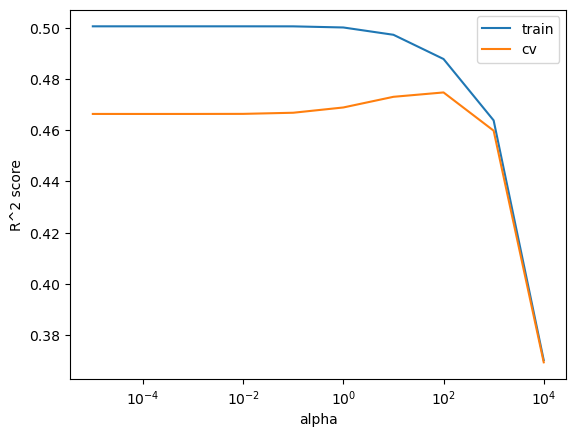

In [75]:

# Hyperparameter tuning 
param_grid = {"ridge__alpha": 10.0 ** np.arange(-5, 5, 1)}

pipe_ridge = make_pipeline(preprocessor, Ridge())

search = GridSearchCV(pipe_ridge, param_grid, return_train_score=True, n_jobs=-1)
search.fit(X_train, y_train)
# in R^2 metrics 
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]

plt.semilogx(param_grid["ridge__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["ridge__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("R^2 score")

In [76]:
# Hyperparameter tuning by RMSE metric

ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # main metric for model selection
    cv=10,
    return_train_score=True,
    n_jobs=-1,
)

ridge_grid.fit(X_train, y_train)
print(f"Best alpha: {ridge_grid.best_params_['ridge__alpha']}")
print(f"Best CV RMSE: {-ridge_grid.best_score_:.3f}")

cv_results = pd.DataFrame(ridge_grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results["mean_test_RMSE"] = -cv_results["mean_test_score"]

display(cv_results[["param_ridge__alpha", "mean_test_RMSE", "mean_train_score"]])

best_ridge = ridge_grid.best_estimator_

ridge_results = pd.DataFrame(
    cross_validate(
        best_ridge,
        X_train, y_train,
        cv=10,
        scoring=scoring,
        return_train_score=True,
    )
)


ridge_results["train_RMSE"] = -ridge_results["train_RMSE"]
ridge_results["test_RMSE"] = -ridge_results["test_RMSE"]

print("\nRidge Regression (Tuned) RMSE summary:")
display(ridge_results[["train_RMSE", "test_RMSE"]].describe())

print(f"Mean Train RMSE: {ridge_results['train_RMSE'].mean():.3f}")
print(f"Mean Test RMSE:  {ridge_results['test_RMSE'].mean():.3f}")

print("\nRidge Regression (Tuned) R² summary:")
display(ridge_results[["train_r2", "test_r2"]].describe())

print(f"Mean Train R²: {ridge_results['train_r2'].mean():.3f}")
print(f"Mean Test R²:  {ridge_results['test_r2'].mean():.3f}")

Best alpha: 100.0
Best CV RMSE: 1.132


,param_ridge__alpha,mean_test_RMSE,mean_train_score
7,100.00000,1.132295,-1.119429
6,10.00000,1.134188,-1.110239
5,1.00000,1.138343,-1.107502
4,0.10000,1.140449,-1.107095
3,0.01000,1.140837,-1.107083
2,0.00100,1.140877,-1.107082
0,0.00001,1.140878,-1.107082
1,0.00010,1.140883,-1.107082
8,1000.00000,1.147243,-1.143613
9,10000.00000,1.231985,-1.231658



Ridge Regression (Tuned) RMSE summary:


,train_RMSE,test_RMSE
count,10.000000,10.000000
mean,1.119429,1.132295
std,0.004014,0.036308
min,1.111176,1.076407
25%,1.118831,1.115076
50%,1.120289,1.127458
75%,1.121268,1.138589
max,1.125125,1.198414


Mean Train RMSE: 1.119
Mean Test RMSE:  1.132

Ridge Regression (Tuned) R² summary:


,train_r2,test_r2
count,10.000000,10.000000
mean,0.487536,0.474705
std,0.002480,0.019862
min,0.483780,0.443414
25%,0.485468,0.463191
50%,0.488207,0.469730
75%,0.488799,0.491103
max,0.491958,0.506466


Mean Train R²: 0.488
Mean Test R²:  0.475


Above represents train scores (in R^2 metric).

Summary: 

BEFORE HYPERPARAMETER TUNING 
- According to the given model, the optimal alpha value of 10^2 gives the best train and cv scores before exponential decrease and a sharp disparity between the two sets.

- The model achieves a mean test R2 score of 0.469, indicating it is able to explain about 46.9% of the variance in the test data on average, which is significantly suboptimal. While this is much better than the previous model, there is still substantial room for improvement. The mean test RMSE of 1.138 is lower than the baseline value of 1.56, however, difference of error by .4 of a review is not enough to warrant the performance of a viable model. 

AFTER HYPERPARAMETER TUNING 
- The above graph demonstrates that the optimal value of 10^2 achieves the best R^2 value for the cross validation set, before exponential decrease following the 10^3 mark. The results are also reflected by the RMSE metric. 

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

### Random Forest, Gradient Boosting, CAT Boost

In [78]:
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Random Forest": RandomForestRegressor(random_state=123),
    "Gradient Boosting": GradientBoostingRegressor(random_state=123),
    "CatBoost": CatBoostRegressor(
        random_state=123,
        verbose=False
    )
}

results_summary = []

for name, model in models.items():
    
    pipe = make_pipeline(preprocessor, model)
    
    results = pd.DataFrame(
        cross_validate(
            pipe,
            X_train, y_train,
            cv=10,
            scoring=scoring,
            return_train_score=True
        )
    )
    
    results["train_RMSE"] = -results["train_RMSE"]
    results["test_RMSE"] = -results["test_RMSE"]
    

    summary = {
        "Model": name,
        "Train R^2": results["train_r2"].mean(),
        "Test R^2": results["test_r2"].mean(),
        "Train RMSE": results["train_RMSE"].mean(),
        "Test RMSE": results["test_RMSE"].mean()
    }
    
    results_summary.append(summary)

results_df = pd.DataFrame(results_summary)
display(results_df.round(3))

,Model,Train R^2,Test R^2,Train RMSE,Test RMSE
0,Random Forest,0.957,0.694,0.325,0.863
1,Gradient Boosting,0.717,0.683,0.832,0.878
2,CatBoost,0.812,0.708,0.677,0.843


### Summary of Results

#### RANDOM FOREST
- Random forest was chosen as unlike ridge or linear regression, the target is not assumed to follow a linear pattern of inputs; this allows the flexible representation of different variables and interactions considering the diversity of the features considered (numerical and categorical). By depending on majority patterns, the trees are also more robust to extreme values. 

- The train  R^2 = 0.957 and test  R^2 = 0.694 indicate that the model explains most of the variance on training data but loses some generalization capacity on unseen data.

- The train RMSE (0.325) versus test RMSE (0.863) confirms this: the model fits the training data closely but has some degree of overfitting, which is typical for high-variance models like Random Forests.

- Despite this, the model performs best overall in predictive accuracy among the three, suggesting it captures the dominant patterns driving the target.

#### GRADIENT BOOSTING
- Gradient Boosting also builds an ensemble of trees, however in a sequential manner, where each learner iteratively corrects the errors of the prior. 

- The train  R^2 = 0.717 and ttest  R^2 = 0.683 show more consistent performance across training and testing data compared to the random forest model, implying the model is less overfit but possibly underfitting as it hasn’t fully captured the complexity in the data.

#### CATBOOST 
- Alike to gradient boosting, CatBoost follows a similar algorithm, however, specialized to handle categorical features natively. By encoding our categorical features of neighbourhood/neighbourhood group/ room-type, the model learns to make discrete target-based encodings while controlling overfitting through ordered boosting.

- The train R^2 = 0.812 and test R^2 = 0.708 suggest CatBoost achieves a strong balance between learning patterns and maintaining generalization.

- The test RMSE (0.843) is the lowest among all models, indicating the most accurate out-of-sample predictions.

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

For the sake of time, we use a CATBOOST model for this question rather than the random forest, which was computationally inefficient despite changing multiple hyperparameters 

In [ ]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFECV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


cat_reg = CatBoostRegressor(
    iterations=100,
    random_state=123,
    verbose=False
)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=cat_reg,
    step=1,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Fit RFECV (using the full dataset — CatBoost handles mixed data)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

plt.figure(figsize=(8,5))
plt.title("RFECV - CatBoost Feature Selection")
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score (−RMSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_)


ValueError: could not convert string to float: 'Spacious and cozy room!'

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<!-- END QUESTION -->

<br><br>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

ridge_pipe = make_pipeline(preprocessor, Ridge(random_state=42))

param_dist = {
    "ridge__alpha": loguniform(1e-5, 1e3),
}


ridge_random = RandomizedSearchCV(
    ridge_pipe,
    param_distributions=param_dist,
    n_iter=100,  # number of random combinations to try
    scoring="neg_root_mean_squared_error", # try by RMSE 
    cv=10,
    n_jobs=-1,
    random_state=123,
    return_train_score=True
)

ridge_random.fit(X_train, y_train)

print(f"Best parameters (Ridge): {ridge_random.best_params_}")
print(f"Best CV RMSE: {-ridge_random.best_score_:.3f}")
ridge_random_results = pd.DataFrame(ridge_random.cv_results_).sort_values("mean_test_score", ascending=False)
ridge_random_results[["param_ridge__alpha", "param_ridge__solver", "mean_test_score", "mean_train_score"]].head()

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd


rf_pipe = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))


param_grid_rf = {
    "randomforestregressor__n_estimators": [100, 200, 400],
    "randomforestregressor__max_depth": [None, 10, 20],
}

rf_grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid_rf,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True
)

rf_grid.fit(X_train, y_train)

print(f"Best params (Random Forest): {rf_grid.best_params_}")
print(f"Best CV RMSE: {-rf_grid.best_score_:.3f}")

rf_cv_results = pd.DataFrame(rf_grid.cv_results_).sort_values("mean_test_score", ascending=False)
rf_cv_results[["param_randomforestregressor__n_estimators",
               "param_randomforestregressor__max_depth",
               "mean_test_score"]].head()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


gbr_pipe = make_pipeline(preprocessor, GradientBoostingRegressor(random_state=42))

param_grid_gbr = {
    "gradientboostingregressor__n_estimators": [100, 300, 500],
    "gradientboostingregressor__learning_rate": [0.01, 0.1, 0.2],
}


gbr_grid = GridSearchCV(
    gbr_pipe,
    param_grid=param_grid_gbr,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True
)

gbr_grid.fit(X_train, y_train)

print(f"Best params (Gradient Boosting): {gbr_grid.best_params_}")
print(f"Best CV RMSE: {-gbr_grid.best_score_:.3f}")

gbr_cv_results = pd.DataFrame(gbr_grid.cv_results_).sort_values("mean_test_score", ascending=False)
gbr_cv_results[["param_gradientboostingregressor__n_estimators",
                "param_gradientboostingregressor__learning_rate",
                "mean_test_score"]].head()


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV


cat_pipe = make_pipeline(preprocessor, CatBoostRegressor(random_state=123, verbose=False))


param_grid_cat = {
    "catboostregressor__depth": [4, 6, 8],
    "catboostregressor__learning_rate": [0.01, 0.05, 0.1],
}


cat_grid = GridSearchCV(
    cat_pipe,
    param_grid=param_grid_cat,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=100,
    return_train_score=True
)

cat_grid.fit(X_train, y_train)


print(f"Best params (CatBoost): {cat_grid.best_params_}")
print(f"Best CV RMSE: {-cat_grid.best_score_:.3f}")

cat_cv_results = pd.DataFrame(cat_grid.cv_results_).sort_values("mean_test_score", ascending=False)
cat_cv_results[["param_catboostregressor__iterations",
                "param_catboostregressor__depth",
                "param_catboostregressor__learning_rate",
                "mean_test_score"]].head()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

Note: for the sake of computation power, we use shap on the catboost model rather than random forest

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

In [ ]:
!pip install shap

Interpretation: 


In [ ]:
# best random forest tree model from hyperparameter tuning
model = rf_grid.best_estimator_

In [ ]:
import shap 

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train) 

In [ ]:
shap.summary_plot(train_shap_values, X_train)

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Our takeaway from this supervised machine learning project follows that the 

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)